In [43]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
import scipy.stats as stats
from sklearn.linear_model import LinearRegression

from scipy.stats import shapiro

In [44]:
np.random.seed(42)
X = np.linspace(0, 10, 30)
eps = np.random.normal(0, 5, size=30)
y = 2 * X + 3 + eps

df = pd.DataFrame({'X': X, 'y': y})

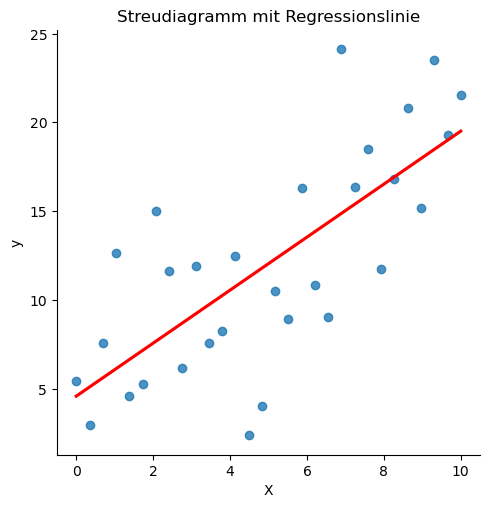

In [45]:
sns.lmplot(data=df, x='X', y='y', ci=None, line_kws={"color": "red"})
plt.title("Streudiagramm mit Regressionslinie")
plt.show()

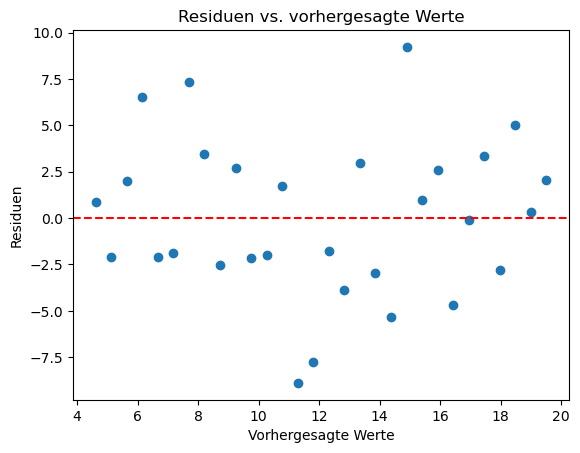

In [46]:
X_const = sm.add_constant(df['X'])
model = sm.OLS(df['y'], X_const).fit()
residuals = model.resid
fitted = model.fittedvalues

plt.scatter(fitted, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Vorhergesagte Werte")
plt.ylabel("Residuen")
plt.title("Residuen vs. vorhergesagte Werte")
plt.show()

C:\Users\hubersi\.conda\envs\stamo24\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


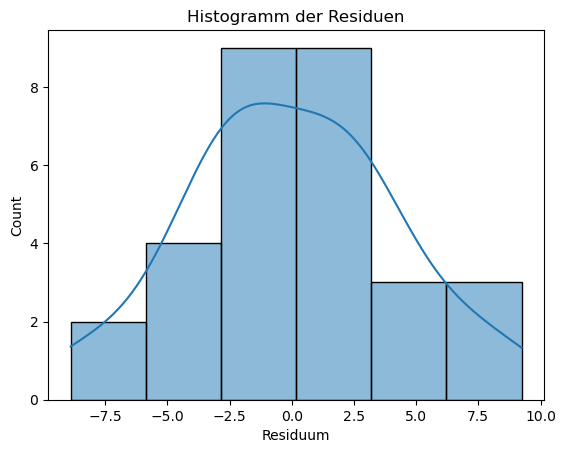

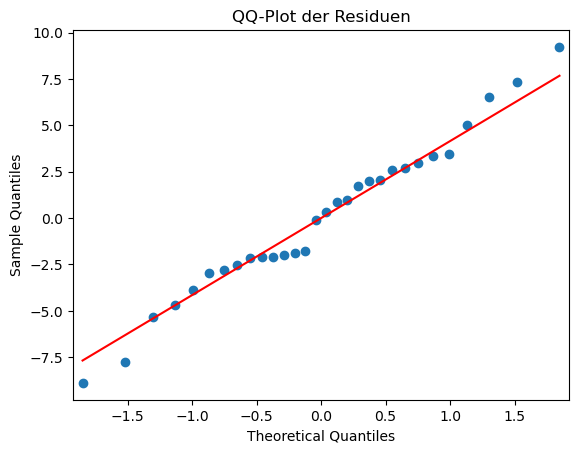

In [47]:
# Histogramm
sns.histplot(residuals, kde=True)
plt.title("Histogramm der Residuen")
plt.xlabel("Residuum")
plt.show()

# QQ-Plot
sm.qqplot(residuals, line='s')
plt.title("QQ-Plot der Residuen")
plt.show()

# Regression vergleichen in Python

In [48]:
df = sns.load_dataset("mpg")

In [49]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [50]:
df["horsepower"] = df["horsepower"].fillna(df["horsepower"].mean())
df["mpg"] = df["mpg"].fillna(df["mpg"].mean())

In [51]:
X = df['horsepower'].values.reshape(-1, 1)
y = df['mpg'].values

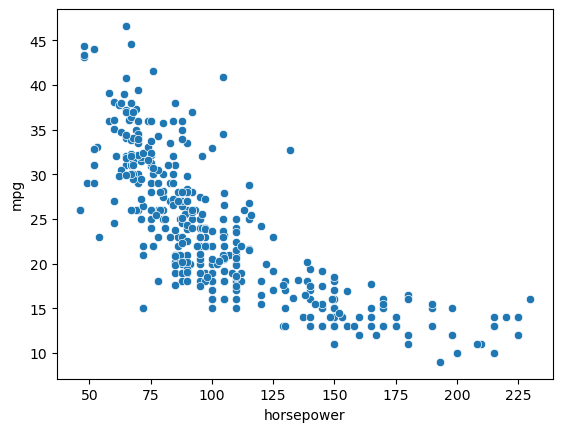

In [52]:
sns.scatterplot(data=df, x="horsepower", y="mpg")
plt.show()

In [53]:
model_sklearn = LinearRegression()
model_sklearn.fit(X, y)

print("Scikit-learn Ergebnisse:")
print(f"  Steigung: {model_sklearn.coef_[0]:.4f}")
print(f"  Achsenabschnitt: {model_sklearn.intercept_:.4f}")
print(f"  R^2: {model_sklearn.score(X, y):.4f}")

Scikit-learn Ergebnisse:
  Steigung: -0.1578
  Achsenabschnitt: 40.0045
  R^2: 0.5951


In [54]:
X_sm = sm.add_constant(X)  # fügt Intercept hinzu
model_sm = sm.OLS(y, X_sm).fit()

print("Statsmodels Zusammenfassung:")
print(model_sm.summary())

Statsmodels Zusammenfassung:
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.595
Model:                            OLS   Adj. R-squared:                  0.594
Method:                 Least Squares   F-statistic:                     582.1
Date:                Tue, 15 Apr 2025   Prob (F-statistic):           9.26e-80
Time:                        15:37:51   Log-Likelihood:                -1202.7
No. Observations:                 398   AIC:                             2409.
Df Residuals:                     396   BIC:                             2417.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         40.0045  

In [55]:
slope, intercept, r_value, p_value, std_err = stats.linregress(df['horsepower'], df['mpg'])

print("SciPy Ergebnisse:")
print(f"  Steigung: {slope:.4f}")
print(f"  Achsenabschnitt: {intercept:.4f}")
print(f"  R: {r_value:.4f}")
print(f"  R^2: {r_value**2:.4f}")
print(f"  p-Wert: {p_value:.4f}")
print(f"  Standardfehler: {std_err:.4f}")

SciPy Ergebnisse:
  Steigung: -0.1578
  Achsenabschnitt: 40.0045
  R: -0.7714
  R^2: 0.5951
  p-Wert: 0.0000
  Standardfehler: 0.0065


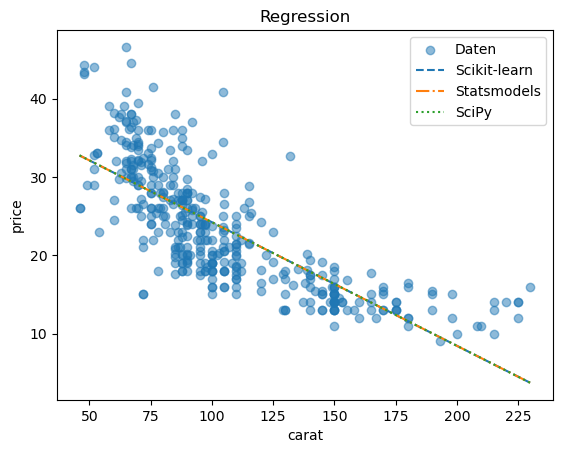

In [56]:
x_vals = np.linspace(df['horsepower'].min(), df['horsepower'].max(), 100)

y_sklearn = model_sklearn.predict(x_vals.reshape(-1, 1))
y_statsmodels = model_sm.predict(sm.add_constant(x_vals))
y_scipy = intercept + slope * x_vals

plt.scatter(df['horsepower'], df['mpg'], label='Daten', alpha=0.5)
plt.plot(x_vals, y_sklearn, label='Scikit-learn', linestyle='--')
plt.plot(x_vals, y_statsmodels, label='Statsmodels', linestyle='-.')
plt.plot(x_vals, y_scipy, label='SciPy', linestyle=':')
plt.title("Regression")
plt.xlabel("carat")
plt.ylabel("price")
plt.legend()
plt.show()

In [57]:
# Modell mit statsmodels fitten (X bereits mit Konstante)
import statsmodels.api as sm
X = df[['horsepower']]
X = sm.add_constant(X)
y = df['mpg']
model = sm.OLS(y, X).fit()
residuals = model.resid
fitted = model.fittedvalues

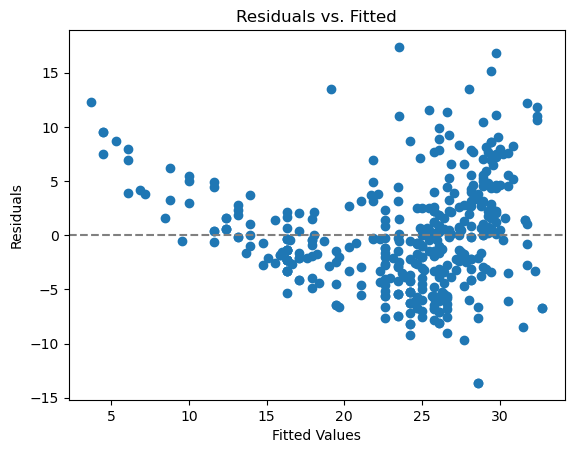

In [58]:
plt.scatter(fitted, residuals)
plt.axhline(0, color='gray', linestyle='--')
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs. Fitted")
plt.show()


C:\Users\hubersi\.conda\envs\stamo24\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


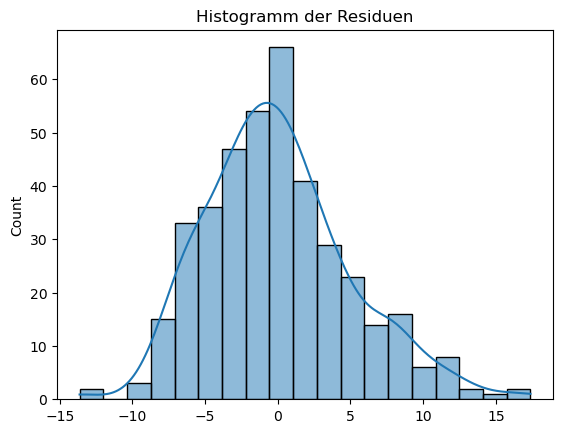

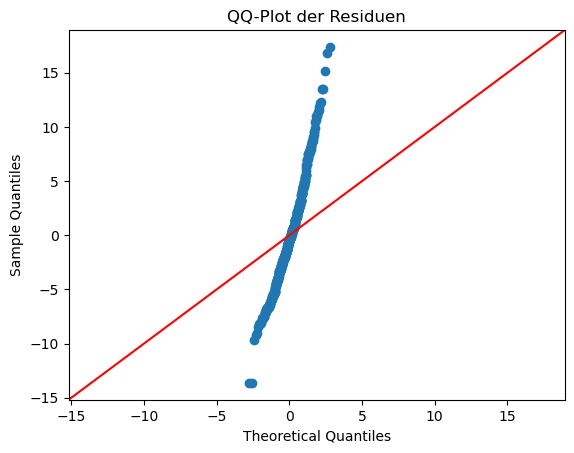

In [59]:
sns.histplot(residuals, kde=True)
plt.title("Histogramm der Residuen")
plt.show()

sm.qqplot(residuals, line='45')
plt.title("QQ-Plot der Residuen")
plt.show()

In [60]:
stat, p = shapiro(residuals)
print("Shapiro-Wilk-Test zur Prüfung auf Normalverteilung der Residuen:")
print(f"  Teststatistik = {stat:.4f}")
print(f"  p-Wert = {p:.4f}")

if p > 0.05:
    print("Die Residuen weichen **nicht signifikant** von einer Normalverteilung ab.")
    print("   → Die Annahme der Normalverteilung kann beibehalten werden.")
else:
    print("Die Residuen weichen **signifikant** von einer Normalverteilung ab.")
    print("   → Die Annahme der Normalverteilung ist verletzt.")


Shapiro-Wilk-Test zur Prüfung auf Normalverteilung der Residuen:
  Teststatistik = 0.9785
  p-Wert = 0.0000
Die Residuen weichen **signifikant** von einer Normalverteilung ab.
   → Die Annahme der Normalverteilung ist verletzt.
